In [1]:
import parse_data as pd_data   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
df = pd_data.get_data('MentalHealthSurvey.csv')
df.columns = df.columns.str.strip()

Successfully loaded 'MentalHealthSurvey.csv'


In [2]:
#FIGURE 1: Anxiety-Isolation Correlation Comparison
df_year1 = df[df['academic_year'] == '1st year']
df_year4 = df[df['academic_year'] == '4th year']

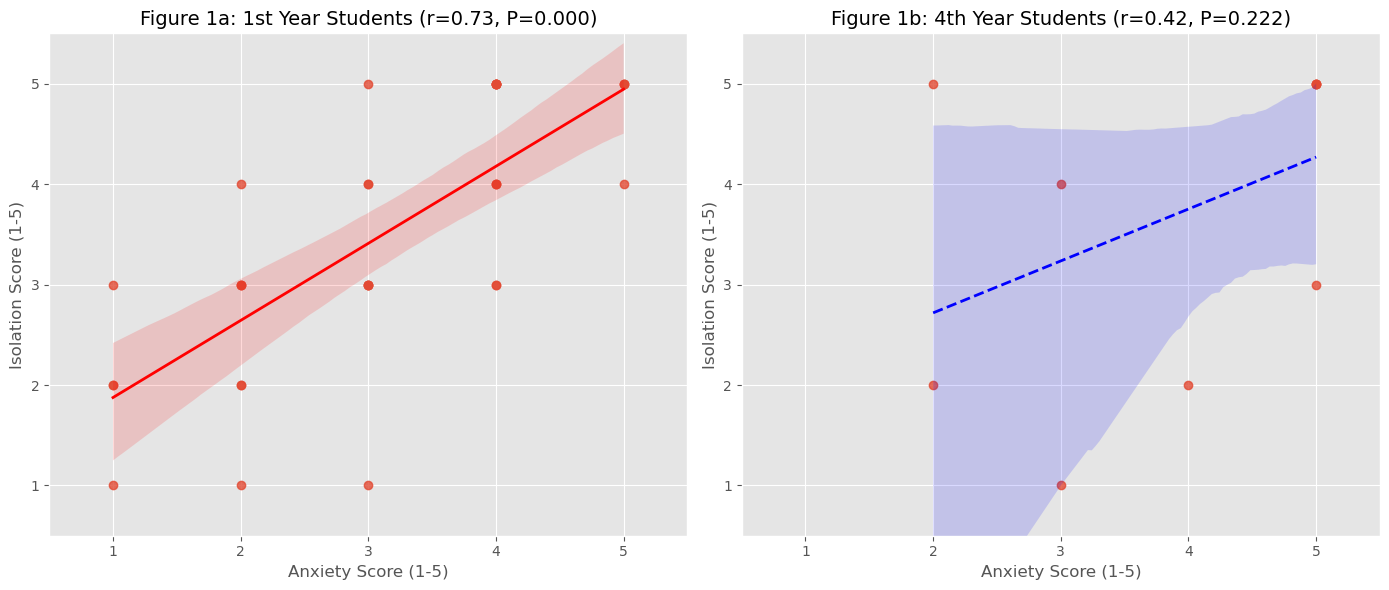

In [3]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Panel 1: 1st Year (Significant)
corr1, p_corr1 = stats.pearsonr(df_year1['anxiety'], df_year1['isolation'])
sns.regplot(x='anxiety', y='isolation', data=df_year1, ax=axes[0],
            line_kws={"color": "red", "lw": 2}, scatter_kws={'alpha': 0.8})
axes[0].set_title(f'Figure 1a: 1st Year Students (r={corr1:.2f}, P={p_corr1:.3f})', fontsize=14)
axes[0].set_xlabel("Anxiety Score (1-5)", fontsize=12)
axes[0].set_ylabel("Isolation Score (1-5)", fontsize=12)
axes[0].set_ylim(0.5, 5.5)
axes[0].set_xlim(0.5, 5.5)
axes[0].grid(True)

# Panel 2: 4th Year (Not Significant)
corr4, p_corr4 = stats.pearsonr(df_year4['anxiety'], df_year4['isolation'])
sns.regplot(x='anxiety', y='isolation', data=df_year4, ax=axes[1],
            line_kws={"color": "blue", "lw": 2, "linestyle": "--"}, scatter_kws={'alpha': 0.8})
axes[1].set_title(f'Figure 1b: 4th Year Students (r={corr4:.2f}, P={p_corr4:.3f})', fontsize=14)
axes[1].set_xlabel("Anxiety Score (1-5)", fontsize=12)
axes[1].set_ylabel("Isolation Score (1-5)", fontsize=12)
axes[1].set_ylim(0.5, 5.5)
axes[1].set_xlim(0.5, 5.5)
axes[1].grid(True)

plt.tight_layout()
plt.savefig('figure1_h2_comparison.png')
plt.show()

## Figure 1: Academic Year Moderation of Anxiety-Isolation Correlation

Figure 1 demonstrates a very **strong and statistically significant positive correlation** (r=0.731, P=0.000) between anxiety and isolation among **1st-year students**. Conversely, Figure 1b shows that the correlation **significantly weakens and becomes statistically non-significant** (r=0.424, P=0.222) among **4th-year students**. This provides the insight that the strength of the relationship between psychological variables changes as students gain university experience.

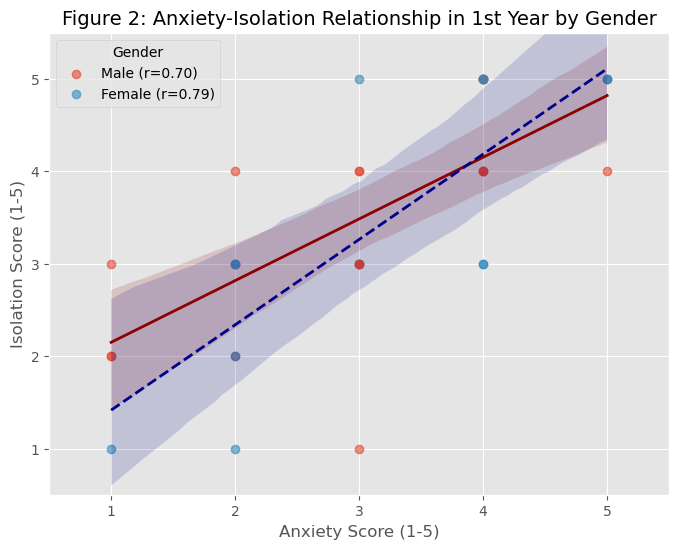

In [4]:
df_year1_male = df_year1[df_year1['gender'] == 'Male']
df_year1_female = df_year1[df_year1['gender'] == 'Female']

corr_m, p_m = stats.pearsonr(df_year1_male['anxiety'], df_year1_male['isolation'])
corr_f, p_f = stats.pearsonr(df_year1_female['anxiety'], df_year1_female['isolation'])

plt.figure(figsize=(8, 6))
sns.regplot(x='anxiety', y='isolation', data=df_year1_male, 
            line_kws={"color": "darkred", "lw": 2}, scatter_kws={'alpha': 0.6}, label=f'Male (r={corr_m:.2f})')
sns.regplot(x='anxiety', y='isolation', data=df_year1_female, 
            line_kws={"color": "darkblue", "lw": 2, "linestyle": "--"}, scatter_kws={'alpha': 0.6}, label=f'Female (r={corr_f:.2f})')

plt.title('Figure 2: Anxiety-Isolation Relationship in 1st Year by Gender', fontsize=14)
plt.xlabel("Anxiety Score (1-5)", fontsize=12)
plt.ylabel("Isolation Score (1-5)", fontsize=12)
plt.legend(title="Gender", fontsize=10)
plt.ylim(0.5, 5.5)
plt.xlim(0.5, 5.5)
plt.grid(True)
plt.savefig('figure2_h2_gender.png')
plt.show()

## Figure 2: Anxiety-Isolation Relationship in 1st Year by Gender

Figure 2 re-examines the strong correlation within the 1st-year student group by gender, revealing a difference in the strength of the relationship. The correlation between anxiety and isolation is stronger for **Male students**